<a href="https://colab.research.google.com/github/Hussahx/IT326-project/blob/main/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Balance data

Before applying data mining techniques, we have to check if our dataset is balanced or not, and if the dataset is unbalanced we have to balance it before constructing any model, to prevent the model from being biased toward the majority class.

In [32]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Processed_dataset.csv')

# Access the 'Level' column
levels = data['Level']

# Count occurrences of each class
num_Low_risk = levels[levels == 1].count()
num_Medium_risk = levels[levels == 2].count()
num_High_risk = levels[levels == 3].count()

# Calculate the total number of entries
total = num_Low_risk + num_Medium_risk + num_High_risk

# Calculate the percentage of each class
percentage_Low_risk = (num_Low_risk / total) * 100
percentage_Medium_risk = (num_Medium_risk / total) * 100
percentage_High_risk = (num_High_risk / total) * 100

# Print the counts and percentages
print("Low risk:", num_Low_risk)
print("Medium risk:", num_Medium_risk)
print("High risk:", num_High_risk)
print("_")
print("Percentage of Low risk: {:.2f}%".format(percentage_Low_risk))
print("Percentage of Medium risk: {:.2f}%".format(percentage_Medium_risk))
print("Percentage of High risk: {:.2f}%".format(percentage_High_risk))

Low risk: 303
Medium risk: 322
High risk: 365
_
Percentage of Low risk: 30.61%
Percentage of Medium risk: 32.53%
Percentage of High risk: 36.87%


This distribution is not perfectly balanced, but it’s fairly close

**Process of correcting data balancing**

In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

encoder = LabelEncoder()

# Prepare features (drop 'Patient Id' and 'Level'), and target
X = data.drop(['Patient Id', 'Level'], axis=1)
y = data['Level']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled features and target
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Level'] = y_resampled

# Print the new class distribution
print("Balanced class distribution:")
print(pd.Series(y_resampled).value_counts())

# Save the balanced dataset
df_resampled.to_csv('Balanced_dataset.csv', index=False)


Balanced class distribution:
Level
1    365
2    365
3    365
Name: count, dtype: int64


After applying SMOTE to the dataset, the class distribution was successfully balanced. Each class (Low, Medium, High Risk) now contains 365 samples, representing an equal share (33.33%) of the dataset. This will help in improving the model’s fairness and performance across all outcome categories.

**Data after balancing process**

In [34]:
import pandas as pd

# Load the balanced dataset
resampled_df = pd.read_csv('Balanced_dataset.csv')

# Calculate the distribution of the 'Level' column
distribution = resampled_df['Level'].value_counts()

# Calculate total number of instances in the balanced dataset
total_resampled = distribution.sum()

# Calculate percentages
percentage_low = (distribution[1] / total_resampled) * 100
percentage_medium = (distribution[2] / total_resampled) * 100
percentage_high = (distribution[3] / total_resampled) * 100

# Print the percentages
print("Percentage of Low Risk (Class 1): {:.2f}%".format(percentage_low))
print("Percentage of Medium Risk (Class 2): {:.2f}%".format(percentage_medium))
print("Percentage of High Risk (Class 3): {:.2f}%".format(percentage_high))



Percentage of Low Risk (Class 1): 33.33%
Percentage of Medium Risk (Class 2): 33.33%
Percentage of High Risk (Class 3): 33.33%





# Loading Data

In [35]:
import pandas as pd
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree
data = pd.read_csv("Processed_dataset.csv")
print(data)

    Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0           P1    2       1       0.142857     0.428571      0.571429   
1          P10    1       1       0.285714     0.000000      0.571429   
2         P100    2       1       0.428571     0.571429      0.714286   
3        P1000    2       1       0.857143     0.857143      0.857143   
4         P101    3       1       0.714286     1.000000      0.857143   
..         ...  ...     ...            ...          ...           ...   
985       P995    3       1       0.714286     0.857143      0.857143   
986       P996    2       2       0.714286     1.000000      0.857143   
987       P997    1       2       0.428571     0.571429      0.714286   
988       P998    1       2       0.714286     1.000000      0.857143   
989       P999    3       1       0.714286     0.571429      0.714286   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                0.428571      0.333333    

# Classification
in classification, the goal is to construct a model based on training examples to distinguish data classes and predict categorical class labels.

To evaluate and compare performance, we used both the Gini index and Entropy as splitting criteria, which influence how the decision tree selects features at each node.

Note: we changed the random state here to 1 because it gave us better result with clearer decision tree, and we applied the feature selection in every classification process

# 60% Training and 40% testing Classification:

Confusion matrix using Gini Index:
 [[120   0   0]
 [  0 129   0]
 [  0   0 147]]

Confusion matrix using Entropy:
 [[120   0   0]
 [  0 129   0]
 [  0   0 147]]

Confusion matrix display using Gini Index and Entropy respectively:


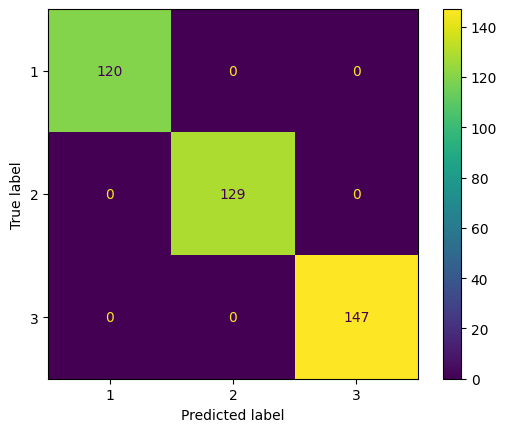

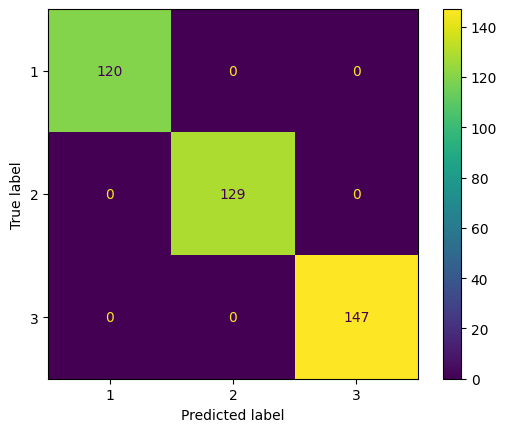

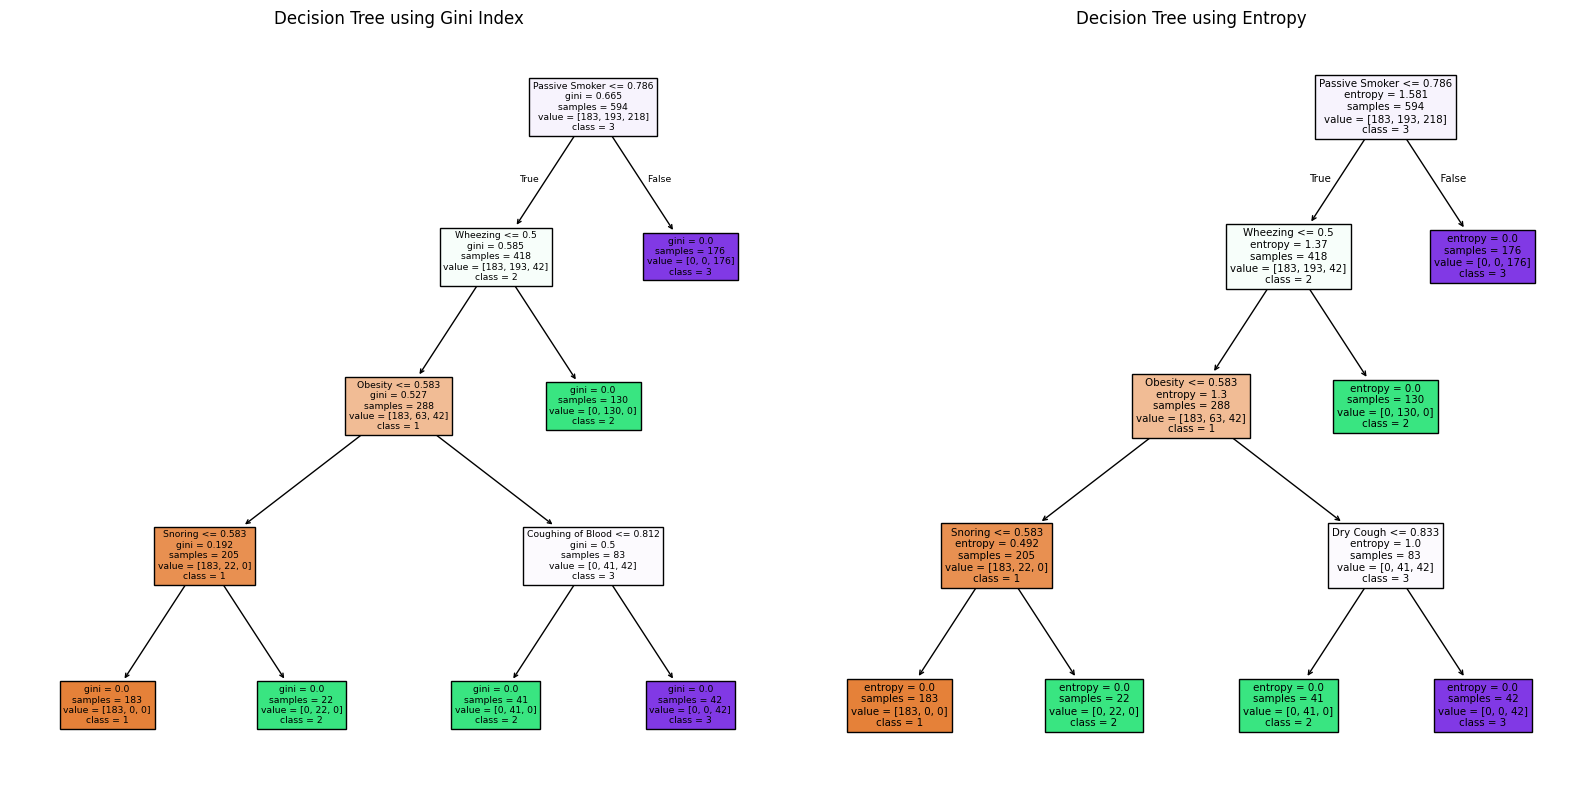


Accuracy using Gini Index: 1.0

Classification Report using Gini Index:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00       129
           3       1.00      1.00      1.00       147

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396


Accuracy using Entropy: 1.0

Classification Report using Entropy:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00       129
           3       1.00      1.00      1.00       147

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396



In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd

data = pd.read_csv("Processed_dataset.csv")

# Separate features and target
X = data.drop(columns=['Patient Id', 'Level'])  # Drop Patient Id and target column
y = data['Level']  # Target column

# Split the data (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Train using gini
clf_gini = DecisionTreeClassifier()
clf_gini.fit(X_train, y_train)

# Train using entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)

# Predictions
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

# Accuracy
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

# Classification report
report_gini = classification_report(y_test, y_pred_gini)
report_entropy = classification_report(y_test, y_pred_entropy)

# Confusion matrix
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
cn = data['Level'].unique()

print("Confusion matrix using Gini Index:\n", cm_gini)
print("\nConfusion matrix using Entropy:\n", cm_entropy)

print("\nConfusion matrix display using Gini Index and Entropy respectively:")
disp_gini = ConfusionMatrixDisplay.from_estimator(clf_gini, X_test, y_test, display_labels=cn)
disp_entropy = ConfusionMatrixDisplay.from_estimator(clf_entropy, X_test, y_test, display_labels=cn)


# Visualize the decision trees
cn = cn.astype(str)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gini tree
plot_tree(clf_gini, filled=True, ax=axes[0], feature_names=X.columns, class_names=cn )
axes[0].set_title('Decision Tree using Gini Index')

# Entropy tree
plot_tree(clf_entropy, filled=True, ax=axes[1], feature_names=X.columns, class_names=cn )
axes[1].set_title('Decision Tree using Entropy')

plt.tight_layout()
plt.show()

# Print accuracy and classification reports
print("\nAccuracy using Gini Index:", accuracy_gini)
print("\nClassification Report using Gini Index:\n", report_gini)
print("\nAccuracy using Entropy:", accuracy_entropy)
print("\nClassification Report using Entropy:\n", report_entropy)

Both decision trees scored perfect accuracy on the test set, with an accuracy score of 1.00. The precision, recall, and F1-score for all classes (low, medium, and high) are also 1.00, indicating that the models perfectly classified the test instances.

# 70% Training and 30% testing Classification:

Confusion matrix using Gini Index:
 [[ 89   0   0]
 [  0  92   0]
 [  0   0 116]]

Confusion matrix using Entropy:
 [[ 89   0   0]
 [  0  92   0]
 [  0   0 116]]

Confusion matrix display using Gini Index and Entropy respectively:


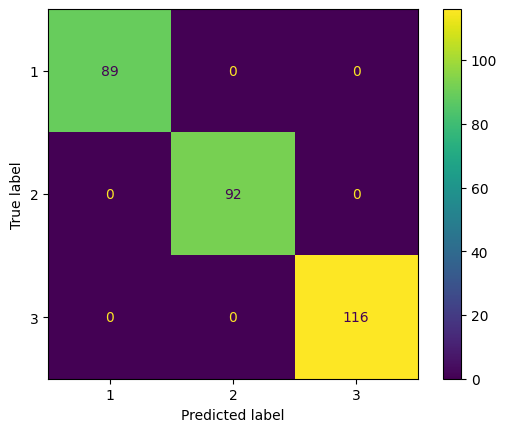

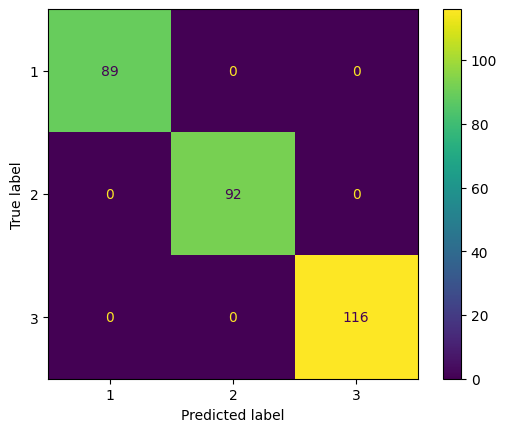

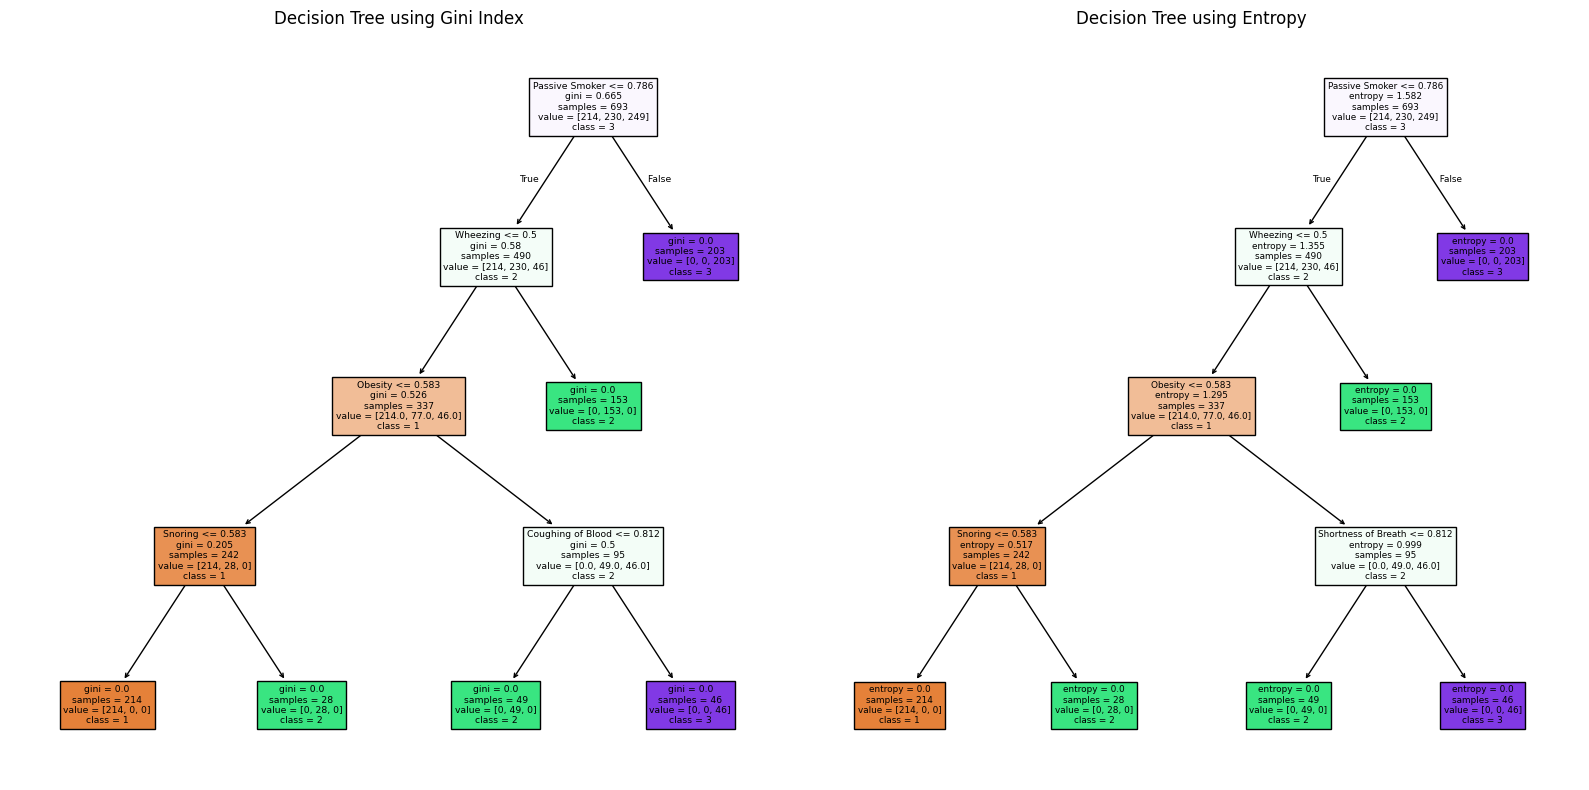


Accuracy using Gini Index: 1.0

Classification Report using Gini Index:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        89
           2       1.00      1.00      1.00        92
           3       1.00      1.00      1.00       116

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297


Accuracy using Entropy: 1.0

Classification Report using Entropy:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        89
           2       1.00      1.00      1.00        92
           3       1.00      1.00      1.00       116

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297



In [37]:


# Separate features and target
X = data.drop(columns=['Patient Id', 'Level'])  # Drop Patient Id and target column
y = data['Level']  # Target column

# Split the data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train using gini
clf_gini = DecisionTreeClassifier()
clf_gini.fit(X_train, y_train)

# Train using entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)

# Predictions
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

# Accuracy
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

# Classification report
report_gini = classification_report(y_test, y_pred_gini)
report_entropy = classification_report(y_test, y_pred_entropy)

# Confusion matrix
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
cn = data['Level'].unique()

print("Confusion matrix using Gini Index:\n", cm_gini)
print("\nConfusion matrix using Entropy:\n", cm_entropy)

print("\nConfusion matrix display using Gini Index and Entropy respectively:")
disp_gini = ConfusionMatrixDisplay.from_estimator(clf_gini, X_test, y_test, display_labels=cn)
disp_entropy = ConfusionMatrixDisplay.from_estimator(clf_entropy, X_test, y_test, display_labels=cn)


# Visualize the decision trees
cn = cn.astype(str)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gini tree
plot_tree(clf_gini, filled=True, ax=axes[0], feature_names=X.columns, class_names=cn )
axes[0].set_title('Decision Tree using Gini Index')

# Entropy tree
plot_tree(clf_entropy, filled=True, ax=axes[1], feature_names=X.columns, class_names=cn )
axes[1].set_title('Decision Tree using Entropy')

plt.tight_layout()
plt.show()

# Print accuracy and classification reports
print("\nAccuracy using Gini Index:", accuracy_gini)
print("\nClassification Report using Gini Index:\n", report_gini)
print("\nAccuracy using Entropy:", accuracy_entropy)
print("\nClassification Report using Entropy:\n", report_entropy)


 # 80% Training and 20% Testing Classification:
In this section, Decision Tree classification was applied to the pre-processed dataset using an 80-20 train-test split. Two attribute selection measures—Gini Index and Entropy—were used. The results were evaluated using accuracy scores, confusion matrices, and decision tree visualizations to understand and compare the performance of both methods.

Confusion matrix using Gini Index:
 [[62  0  0]
 [ 0 61  0]
 [ 0  0 75]]

Confusion matrix using Entropy:
 [[62  0  0]
 [ 0 61  0]
 [ 0  0 75]]

Confusion matrix display using Gini Index and Entropy respectively:


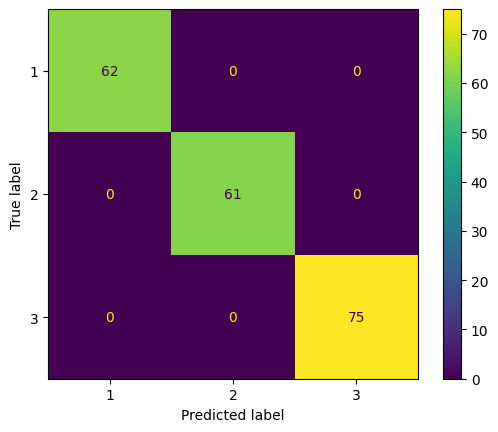

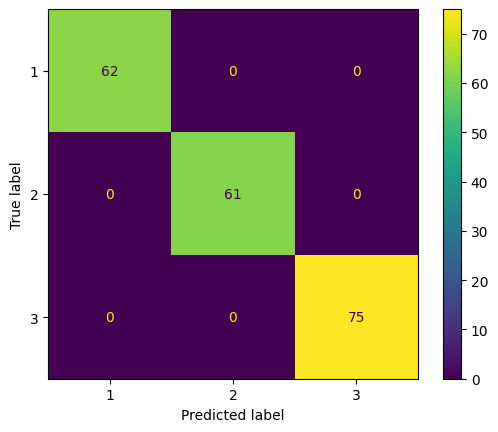

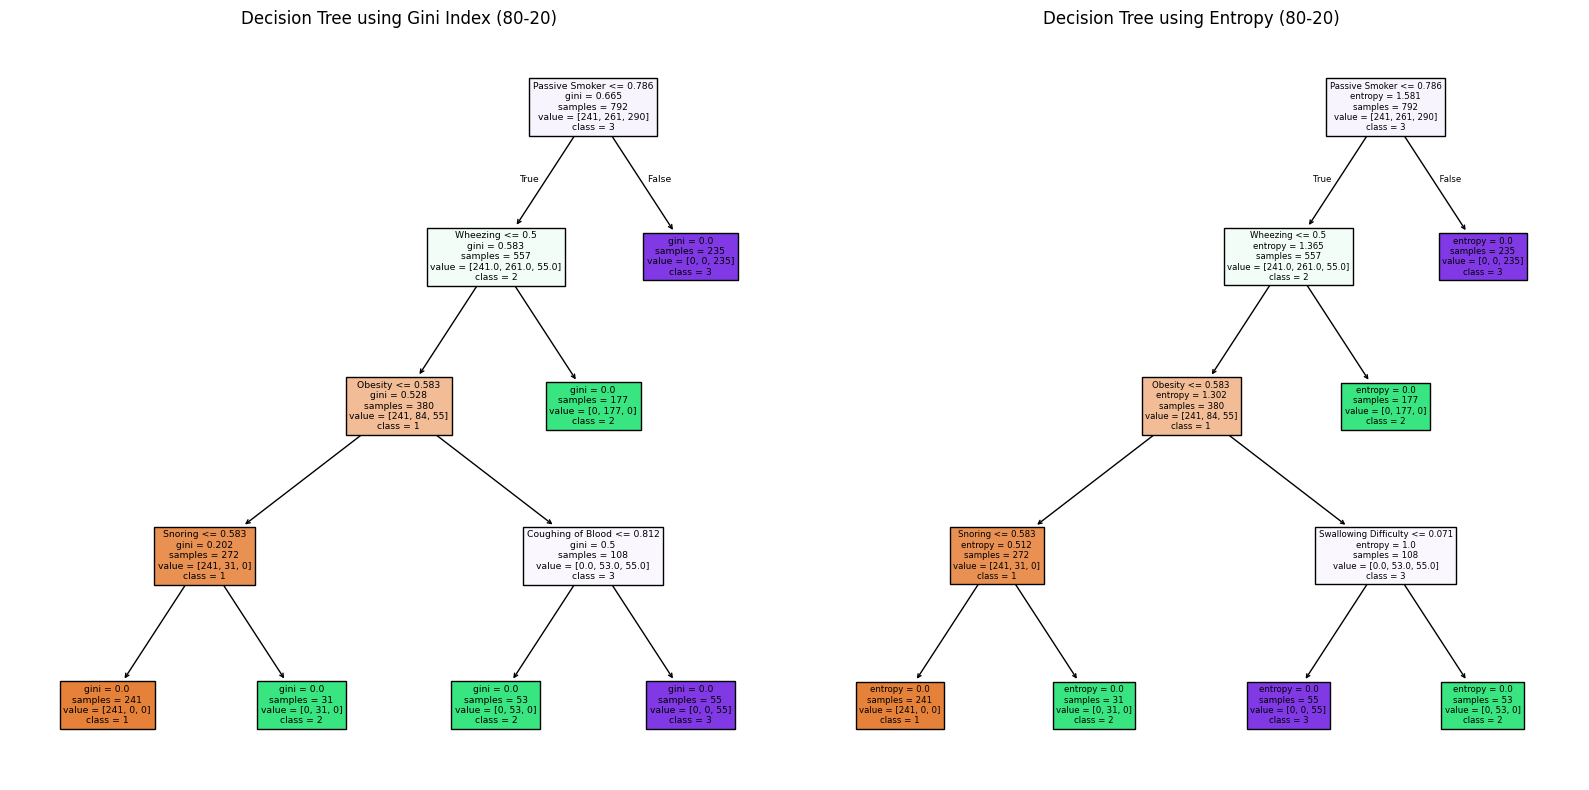


Accuracy using Gini Index: 1.0

Classification Report using Gini Index:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        75

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198


Accuracy using Entropy: 1.0

Classification Report using Entropy:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        75

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198



In [38]:

# Separate features and target
X = data.drop(columns=['Patient Id', 'Level'])  # Drop Patient Id and target column
y = data['Level']  # Target column

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train using Gini
clf_gini = DecisionTreeClassifier()
clf_gini.fit(X_train, y_train)

# Train using Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)

# Predict
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

# Accuracy
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

# Classification report
report_gini = classification_report(y_test, y_pred_gini)
report_entropy = classification_report(y_test, y_pred_entropy)

#  Confusion matrix
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
cn = data['Level'].unique()

print("Confusion matrix using Gini Index:\n", cm_gini)
print("\nConfusion matrix using Entropy:\n", cm_entropy)

#  Display Confusion Matrix
print("\nConfusion matrix display using Gini Index and Entropy respectively:")
ConfusionMatrixDisplay.from_estimator(clf_gini, X_test, y_test, display_labels=cn)
ConfusionMatrixDisplay.from_estimator(clf_entropy, X_test, y_test, display_labels=cn)
plt.show()

#  Visualize the decision trees
cn = cn.astype(str)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gini tree
plot_tree(clf_gini, filled=True, ax=axes[0], feature_names=X.columns, class_names=cn)
axes[0].set_title('Decision Tree using Gini Index (80-20)')

# Entropy tree
plot_tree(clf_entropy, filled=True, ax=axes[1], feature_names=X.columns, class_names=cn)
axes[1].set_title('Decision Tree using Entropy (80-20)')

plt.tight_layout()
plt.show()

#  Print accuracy and classification reports
print("\nAccuracy using Gini Index:", accuracy_gini)
print("\nClassification Report using Gini Index:\n", report_gini)
print("\nAccuracy using Entropy:", accuracy_entropy)
print("\nClassification Report using Entropy:\n", report_entropy)


# Clustering

we applied K-Means clustering to the pre-processed dataset using different values of K, specifically K = 2, 3, and 4. This allowed us to observe how the data separates under different cluster sizes and prepares the ground for evaluating the quality of these groupings using techniques like the Silhouette Coefficient and the Elbow Method.

# Clustering with K=2

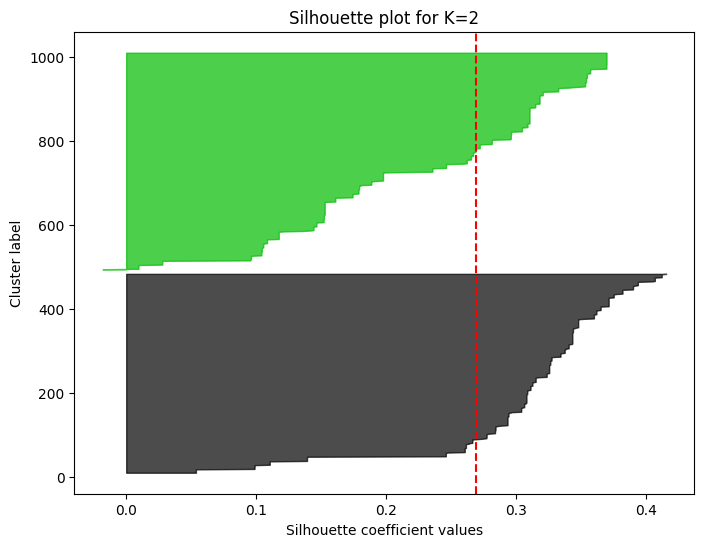

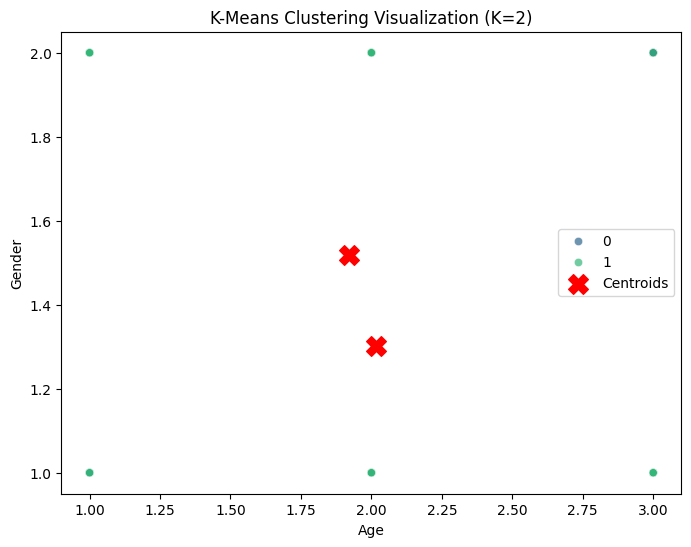

Silhouette Score for K=2: 0.2692
WSS (Inertia) for K=2: 2129.2292


In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

# Define K
k = 2

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Compute silhouette scores
silhouette_avg = silhouette_score(X, clusters)
sample_silhouette_values = silhouette_samples(X, clusters)

# Plot silhouette coefficients
fig, ax1 = plt.subplots(figsize=(8, 6))
y_lower = 10
for i in range(k):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10
ax1.set_title("Silhouette plot for K=2")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()

# Plot clustering centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=clusters, palette="viridis", alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c="red", marker="X", label="Centroids")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("K-Means Clustering Visualization (K=2)")
plt.legend()
plt.show()

# Print results
print(f"Silhouette Score for K=2: {silhouette_avg:.4f}")
print(f"WSS (Inertia) for K={k}: {kmeans.inertia_:.4f}")

We choose K=2 because we assumed it will lead to simple structured groups,which it did but after testing we notice that the silhouette score turned out low so it is not the best fit and we need to try bigger numbers.

#Clustering with K=3


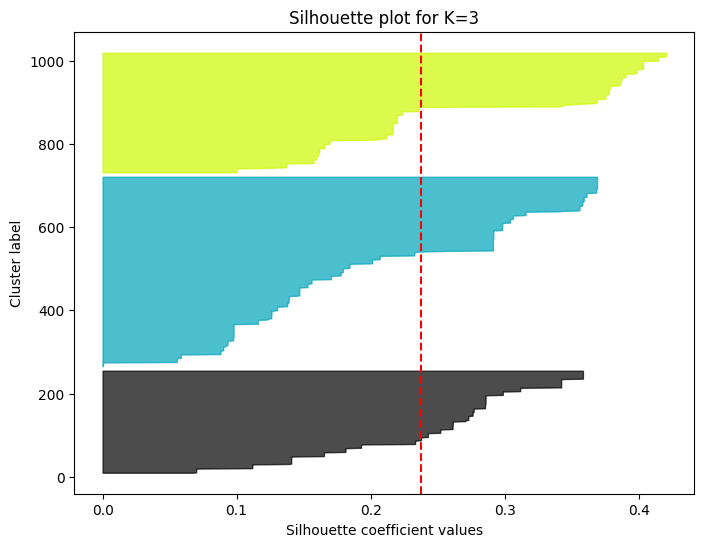

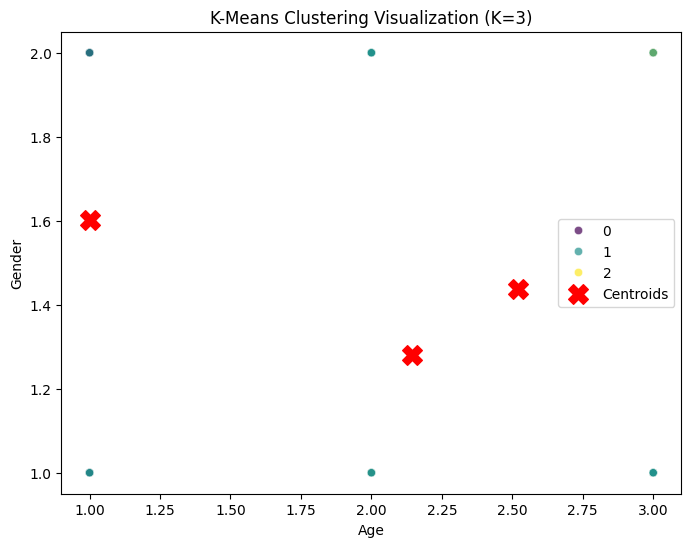

Silhouette Score for K=3: 0.2378
WSS (Inertia) for K=3: 1829.4994


In [14]:
# Define K
k = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Compute silhouette scores
silhouette_avg = silhouette_score(X, clusters)
sample_silhouette_values = silhouette_samples(X, clusters)

# Plot silhouette coefficients
fig, ax1 = plt.subplots(figsize=(8, 6))
y_lower = 10
for i in range(k):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10
ax1.set_title("Silhouette plot for K=3")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()

# Plot clustering centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=clusters, palette="viridis", alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c="red", marker="X", label="Centroids")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("K-Means Clustering Visualization (K=3)")
plt.legend()
plt.show()

# Print results
print(f"Silhouette Score for K=3: {silhouette_avg:.4f}")
print(f"WSS (Inertia) for K={k}: {kmeans.inertia_:.4f}")

We chose K=3 assuming the data might group into low, medium, and high risk categories. This was based on our features. While it gave more detail than K=2, the silhouette score was still low, so we decided to try higher K values.

# Clustering with K=4

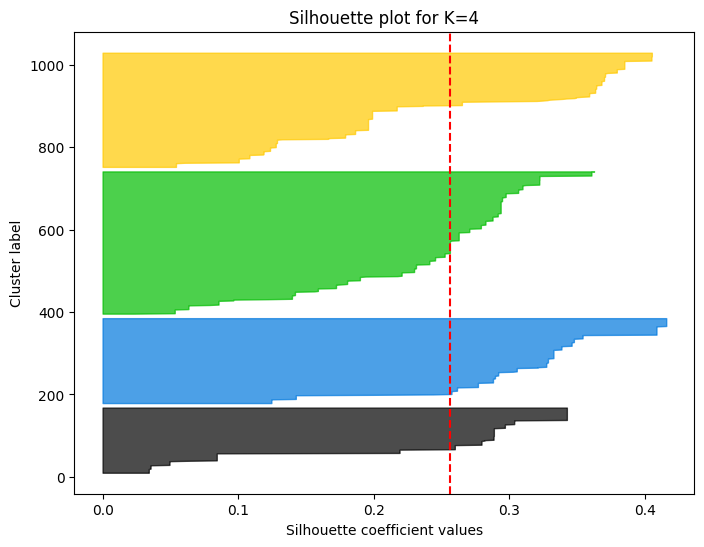

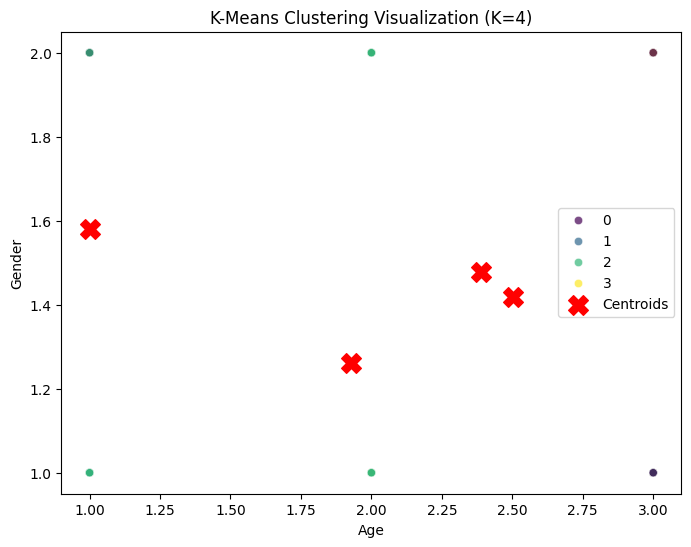

Silhouette Score for K=4: 0.2561
WSS (Inertia) for K=4: 1589.2805


In [15]:
# Define K
k = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Compute silhouette scores
silhouette_avg = silhouette_score(X, clusters)
sample_silhouette_values = silhouette_samples(X, clusters)

# Plot silhouette coefficients
fig, ax1 = plt.subplots(figsize=(8, 6))
y_lower = 10
for i in range(k):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10
ax1.set_title("Silhouette plot for K=4")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()

# Plot clustering centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=clusters, palette="viridis", alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c="red", marker="X", label="Centroids")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("K-Means Clustering Visualization (K=4)")
plt.legend()
plt.show()

# Print results
print(f"Silhouette Score for K=4: {silhouette_avg:.4f}")
print(f"WSS (Inertia) for K={k}: {kmeans.inertia_:.4f}")

We chose K=4 to explore how the dataset behaves when divided into more specific groups. Increasing K can sometimes reveal hidden patterns or subgroups in the data. Trying K=4 allowed us to test if a finer segmentation would lead to more meaningful or compact clusters compared to simpler configurations like K=2 or K=3.

# Comparison between k=2,3,4 (Evaluation using Silhouette Score and Elbow method)


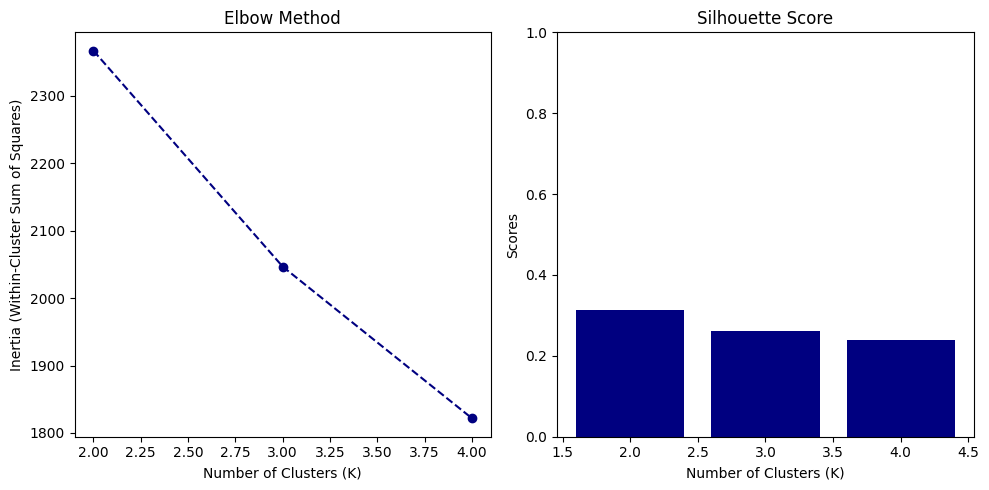

In [16]:
# Needed values for K
k_values = [2, 3, 4]
wcss = []
silhouette_scores = []

# extract only the numeric values
numeric_data= data.select_dtypes(include=['float64','int64'])

#K_Means
for k in k_values:
  model = KMeans(n_clusters=k, random_state=42,n_init=10)
  model.fit(numeric_data)
  wcss.append(model.inertia_)
  silhouette_scores.append(silhouette_score(numeric_data, model.labels_))

# Draw the result
plt.figure(figsize=(10,5))

# Elbow
plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker='o', linestyle='--', color='navy')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')

#Silhouette
plt.subplot(1,2,2)
plt.bar(k_values, silhouette_scores, color='navy')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Scores')
plt.ylim(0,1)

plt.tight_layout()
plt.show()




**Average Silhouette Width:**

The average silhouette width measures how similar a data point is to its own cluster compared to other clusters. Higher values indicate better-defined clusters. The values obtained are:


K=2: 0.2692

K=3: 0.2378

K=4:0.2512


The highest average silhouette width is observed for K=2, indicating that the data points are more distinctly separated into clusters with this configuration.
K=4 performs better than K=3, suggesting slightly better-defined clusters in the K=4 configuration compared to K=3.

**Within-Cluster Sum of Squares (WSS):**

WSS measures the compactness of clusters, representing the sum of squared distances between each data point and its assigned centroid. Lower values of WSS indicate tighter clusters. The values obtained are:


K=2: 2129.2292

K=3: 1829.4994

K=4: 1586.8546

The lowest WSS is observed for K=4, suggesting that the clusters are the most compact in this configuration.
K=2 has the highest WSS, meaning its clusters are more dispersed compared to K=3 and K=4.

**Based on these metrics:**

K=2 achieves the best cluster separation (highest silhouette score), but has the loosest clusters (highest WSS).

K=4 forms the most compact clusters (lowest WSS) and maintains a decent silhouette score, outperforming K=3.

K=3 provides a middle ground but is weaker overall, having the lowest silhouette score and moderate WSS.



